**Data Loading**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train (1).xlsx to Data_Train (1).xlsx


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
train_data=pd.read_excel("Data_Train (1).xlsx")

In [3]:
train_data.shape #OUR TRAIN DATA HAS 10683 ROWS AND 11 COLUMNS

(10683, 11)

In [4]:
#CHECKING FOR NULL VALUES
#THERE IS ONLY ONE NULL VALUE IN THE ROUTE COLUMN AND CORRESPONDINGLY THE TOTAL STOPS COLUMN TOO HAS A NULL VALUE 

In [5]:
train_data.isna().sum() 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.dropna(inplace=True)

In [7]:
#ONE ROW HAS BEEN DROPPED WHICH HAD NULL VALUES IN IT
#NOW I WILL BE IMPORTING MY TEST DATA
from google.colab import files
uploaded=files.upload()

Saving Test_set.xlsx to Test_set.xlsx


In [8]:
test_data=pd.read_excel("Test_set.xlsx")

In [9]:
test_data.info() #Our test data has 2671 entries with a total of 10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
#Checking for null values in the test data
print(test_data.isnull().sum())
#There are no null values in our test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [11]:
#Now,we will merge our training data and test data to perform data preprocessing.
big_df=train_data.append(test_data,sort=False)

**Data Preprocessing**

In [12]:
#Now I will create some new columns based on these columns.
#Extracting the day,month,year,weekday from the Date column to know how the price has varied across different months,days etc.
import datetime as dt
big_df['Date_of_Journey']=pd.to_datetime(big_df.Date_of_Journey,format='%d/%m/%Y')
big_df['Date']=big_df.Date_of_Journey.dt.day
big_df['Month']=big_df.Date_of_Journey.dt.month
big_df['Year']=big_df.Date_of_Journey.dt.year
big_df['Day']=big_df.Date_of_Journey.dt.weekday

In [13]:
#Now we will drop the Date_of_Journey column
big_df.drop('Date_of_Journey',axis=1,inplace=True)

In [14]:
#we will create another column now which will be based on the total stops.
big_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [15]:
big_df['Total_Stops']=big_df['Total_Stops'].replace('non-stop','0 stops') #Replacing the non stops with 0 stops.
big_df['Total_Stops'].isnull().sum()

0

In [16]:
big_df['Stops']=big_df['Total_Stops'].str.split(' ').str[0]

In [17]:
big_df.drop('Total_Stops',axis=1,inplace=True) #We are dropping this column because we have already created one based on stops.

In [18]:
#We will be calculating te duration in minutes of each flight using the duration column.
import re
big_df['Hours']=big_df['Duration'].str.extract('(\d{1,}h)')
big_df['Minutes']=big_df['Duration'].str.extract('(\d{1,}m)')

In [19]:
big_df['Hours']=big_df['Hours'].str.strip('h')
big_df['Minutes']=big_df['Minutes'].str.strip('m')

In [20]:
big_df['Hours']=big_df['Hours'].fillna(0)

In [21]:
big_df['Minutes']=big_df['Minutes'].fillna(0)

In [22]:
big_df['Hours']=pd.to_numeric(big_df['Hours'])
big_df['Minutes']=pd.to_numeric(big_df['Minutes'])
big_df['Duration1']=(big_df['Hours']*60)+big_df['Minutes']

In [23]:
big_df["Duration1"] =big_df["Duration1"].astype(int)
big_df["Day"] = big_df["Day"].astype(object)
big_df["Month"] = big_df["Month"].astype(object)
big_df["Date"] = big_df["Date"].astype(object)

In [24]:
#ye maine abhi run nhi kia hai big_df["Month"]=big_df["Month"].replace({3:"March",4:"April",5:"May",6:"June"})

In [25]:
#Creating another column which will tell us whether the departure time is in morning,afternoon etc and same applies for the arrival column
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'    
    elif(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    return x
big_df['Dep_Time']=big_df['Dep_Time'].apply(deparrtime)
big_df['Arrival_Time']=big_df['Arrival_Time'].apply(deparrtime)
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,2h 50m,No info,3897.0,24,3,2019,6,0,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,No info,7662.0,1,5,2019,2,2,7,25,445


In [26]:
#Splitting the Route column.
big_df['Route_1']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_2']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_3']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_4']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_5']=big_df['Route'].str.split('→ ').str[4]

In [27]:
big_df['Route_1']=big_df['Route_1'].str.extract('(\S*)')
big_df['Route_2']=big_df['Route_2'].str.extract('(\S*)')
big_df['Route_3']=big_df['Route_3'].str.extract('(\S*)')
big_df['Route_4']=big_df['Route_4'].str.extract('(\S*)')
big_df['Route_5']=big_df['Route_5'].str.extract('(\S*)')

In [28]:
big_df['Date']=big_df['Date'].astype(int)
big_df['Stops']=big_df['Stops'].astype(int)
big_df['Day']=big_df['Day'].astype(int)

In [29]:
big_df['Destination'].value_counts()

Cochin       5681
Banglore     3581
Delhi        1582
New Delhi    1170
Hyderabad     883
Kolkata       456
Name: Destination, dtype: int64

In [30]:
big_df['Airline'].value_counts() 

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [31]:
#Since our data has some airlines which are not used by a larger proportion of people so we will group these uncommon airlines.
list=['GoAir','Multiple carriers Premium economy','Jet Airways Business','Vistara Premium economy','Trujet','Air Asia']
filt=big_df['Airline'].isin(list)
big_df.loc[filt,'Airline']='Others'

In [32]:
big_df['Arrival_Time'].value_counts()

Night        4608
Evening      3877
Morning      2454
Afternoon    2414
Name: Arrival_Time, dtype: int64

In [33]:
big_df['Airline'].value_counts()

Jet Airways          4746
IndiGo               2564
Air India            2191
Multiple carriers    1543
SpiceJet             1026
Others                675
Vistara               608
Name: Airline, dtype: int64

In [34]:
big_df['Stops'].value_counts()
big_df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,2h 50m,No info,3897.0,24,3,2019,6,0,2,50,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,No info,7662.0,1,5,2019,2,2,7,25,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,19h,No info,13882.0,9,6,2019,6,2,19,0,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,5h 25m,No info,6218.0,12,5,2019,6,1,5,25,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,4h 45m,No info,13302.0,1,3,2019,4,1,4,45,285,BLR,NAG,DEL,NaN,NaN


In [35]:
list=['No check-in baggage included','1 Long layover','Change airports','Business class','No Info','1 Short layover','2 Long layover','Red-eye flight']
filt=big_df['Additional_Info'].isin(list)
big_df.loc[filt,'Additional_Info']='Others'

In [36]:
big_df.groupby(['Date'])['Price'].min('Price') #Since the min price does not vary a lot so we will eventually drop the date column.  

Date
1     1965.0
3     1759.0
6     1965.0
9     1965.0
12    1965.0
15    1965.0
18    1965.0
21    1759.0
24    1965.0
27    1759.0
Name: Price, dtype: float64

In [37]:
big_df['Additional_Info'].value_counts()

No info                        10492
In-flight meal not included     2426
Others                           435
Name: Additional_Info, dtype: int64

In [38]:
for i in range(len(big_df['Date'])):
    if big_df['Date'].values[i] >1 and big_df['Date'].values[i] <=10:
        big_df['Date'].values[i] = 1
    elif big_df['Date'].values[i] >10 and big_df['Date'].values[i] <=20:
        big_df['Date'].values[i] = 2
    elif big_df['Date'].values[i] >20 and big_df['Date'].values[i] <=30:
        big_df['Date'].values[i] = 3    
    

In [39]:
big_df['Date'] =big_df['Date'].replace((1,2,3),('Start','Middle','End'))

In [40]:
from google.colab import files
uploaded=files.upload()

Saving convertcsv (1).csv to convertcsv (1).csv


In [41]:
airports=pd.read_csv('convertcsv (1).csv')

In [42]:
import re
airports['Latitude1']=airports['Latitude'].str.extract("(\d+\.\d+)")
airports['Longitude1']=airports['Longitude'].str.extract("(\d+\.\d+)")

In [43]:
airports['Latitude1'] = airports['Latitude1'].astype(float)
airports['Longitude1'] = airports['Longitude1'].astype(float)

In [44]:
airports.columns

Index(['Kind', 'ICAO', 'FAA', 'IATA', 'City', 'Name', 'Latitude', 'Longitude',
       'Max Runway', 'Airlines', 'Latitude1', 'Longitude1'],
      dtype='object')

In [45]:
airports1=airports.copy()

In [46]:
airports1.drop(columns=['Kind', 'ICAO', 'FAA','City', 'Name', 'Latitude', 'Longitude','Max Runway', 'Airlines'],inplace=True) 

In [47]:
airports1.drop(columns='Longitude1',inplace=True)

In [48]:
a=airports1.set_index('IATA').to_dict()

In [49]:
print(a)

{'Latitude1': {nan: 13.136, 'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.

In [50]:
big_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,2h 50m,No info,3897.0,End,3,2019,6,0,2,50,170,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,No info,7662.0,Start,5,2019,2,2,7,25,445,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,19h,No info,13882.0,Start,6,2019,6,2,19,0,1140,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,5h 25m,No info,6218.0,Middle,5,2019,6,1,5,25,325,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,4h 45m,No info,13302.0,Start,3,2019,4,1,4,45,285,BLR,NAG,DEL,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,Evening,Evening,23h 55m,No info,NaN,Start,6,2019,3,1,23,55,1435,CCU,DEL,BLR,NaN,NaN
2667,IndiGo,Kolkata,Banglore,CCU → BLR,Afternoon,Evening,2h 35m,No info,NaN,End,3,2019,2,0,2,35,155,CCU,BLR,NaN,NaN,NaN
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,Night,Night,6h 35m,No info,NaN,Start,3,2019,2,1,6,35,395,DEL,BOM,COK,NaN,NaN
2669,Air India,Delhi,Cochin,DEL → BOM → COK,Night,Evening,15h 15m,No info,NaN,Start,3,2019,2,1,15,15,915,DEL,BOM,COK,NaN,NaN


In [51]:
big_df['Route_11']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_22']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_33']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_44']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_55']=big_df['Route'].str.split('→ ').str[4]

In [52]:
big_df['Route_11']=big_df['Route_11'].str.extract('(\S*)')
big_df['Route_22']=big_df['Route_22'].str.extract('(\S*)')
big_df['Route_33']=big_df['Route_33'].str.extract('(\S*)')
big_df['Route_44']=big_df['Route_44'].str.extract('(\S*)')
big_df['Route_55']=big_df['Route_55'].str.extract('(\S*)')

In [53]:
big_df['Route_11'].fillna("None",inplace=True)
big_df['Route_22'].fillna("None",inplace=True)
big_df['Route_33'].fillna("None",inplace=True)
big_df['Route_44'].fillna("None",inplace=True)
big_df['Route_55'].fillna("None",inplace=True)

In [54]:
big_df['Route_11']=big_df['Route_11'].map({'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.622, 'DHM': 32.165, 'GOP': 26.74, 'GAU': 26.106, 'GWL': 26.293, 'HBX': 15.362, 'HYD': 17.231, 'BPM': 17.453, 'IMF': 24.76, 'IDR': 22.722, 'JGB': 19.074, 'JAI': 26.824, 'IXJ': 32.689, 'JGA': 22.466, 'PYB': 18.88, 'JDH': 26.251, 'JRH': 26.732, 'IXY': 23.113, 'CCJ': 11.137, 'HJR': 24.817, 'IXN': 24.062, 'CCU': 22.655, 'KTU': 25.16, 'IXS': 24.913, 'LKO': 26.761, 'MAA': 12.994, 'IXM': 9.835, 'LDA': 25.033, 'IXE': 12.961, 'BOM': 19.089, 'MYQ': 12.307, 'NAG': 21.092, 'NDC': 19.182, 'NVY': 11.613, 'IXI': 27.295, 'OMN': 18.281, 'PGH': 29.033, 'IXT': 28.066, 'PAT': 25.591, 'PBD': 21.649, 'IXZ': 11.641, 'PUT': 14.149, 'PNQ': 18.582, 'RPR': 21.18, 'RJA': 17.11, 'RAJ': 22.309, 'RMD': 18.701, 'IXR': 23.314, 'SXV': 11.783, 'SHL': 25.704, 'IXB': 26.681, 'SSE': 17.628, 'SXR': 33.987, 'TEI': 27.941, 'TJV': 10.722, 'TRZ': 10.765, 'TIR': 13.632, 'TRV': 8.482, 'UDR': 24.618, 'BDQ': 22.336, 'VNS': 25.452, 'VTZ': 17.721, 'WGC': 17.914})

In [55]:
big_df['Route_22']=big_df['Route_22'].map({'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.622, 'DHM': 32.165, 'GOP': 26.74, 'GAU': 26.106, 'GWL': 26.293, 'HBX': 15.362, 'HYD': 17.231, 'BPM': 17.453, 'IMF': 24.76, 'IDR': 22.722, 'JGB': 19.074, 'JAI': 26.824, 'IXJ': 32.689, 'JGA': 22.466, 'PYB': 18.88, 'JDH': 26.251, 'JRH': 26.732, 'IXY': 23.113, 'CCJ': 11.137, 'HJR': 24.817, 'IXN': 24.062, 'CCU': 22.655, 'KTU': 25.16, 'IXS': 24.913, 'LKO': 26.761, 'MAA': 12.994, 'IXM': 9.835, 'LDA': 25.033, 'IXE': 12.961, 'BOM': 19.089, 'MYQ': 12.307, 'NAG': 21.092, 'NDC': 19.182, 'NVY': 11.613, 'IXI': 27.295, 'OMN': 18.281, 'PGH': 29.033, 'IXT': 28.066, 'PAT': 25.591, 'PBD': 21.649, 'IXZ': 11.641, 'PUT': 14.149, 'PNQ': 18.582, 'RPR': 21.18, 'RJA': 17.11, 'RAJ': 22.309, 'RMD': 18.701, 'IXR': 23.314, 'SXV': 11.783, 'SHL': 25.704, 'IXB': 26.681, 'SSE': 17.628, 'SXR': 33.987, 'TEI': 27.941, 'TJV': 10.722, 'TRZ': 10.765, 'TIR': 13.632, 'TRV': 8.482, 'UDR': 24.618, 'BDQ': 22.336, 'VNS': 25.452, 'VTZ': 17.721, 'WGC': 17.914})

In [56]:
big_df['Route_33']=big_df['Route_33'].map({'None':0,'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'ISK':20.1129,'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.622, 'DHM': 32.165, 'GOP': 26.74, 'GAU': 26.106, 'GWL': 26.293, 'HBX': 15.362, 'HYD': 17.231, 'BPM': 17.453, 'IMF': 24.76, 'IDR': 22.722, 'JGB': 19.074, 'JAI': 26.824, 'IXJ': 32.689, 'JGA': 22.466, 'PYB': 18.88, 'JDH': 26.251, 'JRH': 26.732, 'IXY': 23.113, 'CCJ': 11.137, 'HJR': 24.817, 'IXN': 24.062, 'CCU': 22.655, 'KTU': 25.16, 'IXS': 24.913, 'LKO': 26.761, 'MAA': 12.994, 'IXM': 9.835, 'LDA': 25.033, 'IXE': 12.961, 'BOM': 19.089, 'MYQ': 12.307, 'NAG': 21.092, 'NDC': 19.182, 'NVY': 11.613, 'IXI': 27.295, 'OMN': 18.281, 'PGH': 29.033, 'IXT': 28.066, 'PAT': 25.591, 'PBD': 21.649, 'IXZ': 11.641, 'PUT': 14.149, 'PNQ': 18.582, 'RPR': 21.18, 'RJA': 17.11, 'RAJ': 22.309, 'RMD': 18.701, 'IXR': 23.314, 'SXV': 11.783, 'SHL': 25.704, 'IXB': 26.681, 'SSE': 17.628, 'SXR': 33.987, 'TEI': 27.941, 'TJV': 10.722, 'TRZ': 10.765, 'TIR': 13.632, 'TRV': 8.482, 'UDR': 24.618, 'BDQ': 22.336, 'VNS': 25.452, 'VTZ': 17.721, 'WGC': 17.914})

In [57]:
big_df['Route_44']=big_df['Route_44'].map({'None':0,'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.622, 'DHM': 32.165, 'GOP': 26.74, 'GAU': 26.106, 'GWL': 26.293, 'HBX': 15.362, 'HYD': 17.231, 'BPM': 17.453, 'IMF': 24.76, 'IDR': 22.722, 'JGB': 19.074, 'JAI': 26.824, 'IXJ': 32.689, 'JGA': 22.466, 'PYB': 18.88, 'JDH': 26.251, 'JRH': 26.732, 'IXY': 23.113, 'CCJ': 11.137, 'HJR': 24.817, 'IXN': 24.062, 'CCU': 22.655, 'KTU': 25.16, 'IXS': 24.913, 'LKO': 26.761, 'MAA': 12.994, 'IXM': 9.835, 'LDA': 25.033, 'IXE': 12.961, 'BOM': 19.089, 'MYQ': 12.307, 'NAG': 21.092, 'NDC': 19.182, 'NVY': 11.613, 'IXI': 27.295, 'OMN': 18.281, 'PGH': 29.033, 'IXT': 28.066, 'PAT': 25.591, 'PBD': 21.649, 'IXZ': 11.641, 'PUT': 14.149, 'PNQ': 18.582, 'RPR': 21.18, 'RJA': 17.11, 'RAJ': 22.309, 'RMD': 18.701, 'IXR': 23.314, 'SXV': 11.783, 'SHL': 25.704, 'IXB': 26.681, 'SSE': 17.628, 'SXR': 33.987, 'TEI': 27.941, 'TJV': 10.722, 'TRZ': 10.765, 'TIR': 13.632, 'TRV': 8.482, 'UDR': 24.618, 'BDQ': 22.336, 'VNS': 25.452, 'VTZ': 17.721, 'WGC': 17.914})

In [58]:
big_df['Route_55']=big_df['Route_55'].map({'None':0,'IXK': 21.317, 'JSA': 26.889, 'AGX': 10.824, 'STV': 21.114, 'NMB': 20.434, 'RTC': 17.014, 'KLH': 16.665, 'BUP': 30.27, 'IXP': 32.234, 'HSS': 29.179, 'LUH': 30.855, 'VDY': 15.175, 'AKD': 20.699, 'SLV': 31.082, 'KUU': 31.877, 'GUX': 24.655, 'AGR': 27.156, 'TCR': 8.724, 'CDP': 14.51, 'PNY': 11.969, 'JLR': 23.178, 'KNU': 26.441, 'VGA': 16.53, 'TNI': 24.562, 'PAB': 21.988, 'RRK': 22.257, 'GAY': 24.744, 'MZU': 26.119, 'IXW': 22.813, 'DBD': 23.834, 'COH': 26.331, 'RUP': 26.14, 'IXQ': 24.132, 'IXH': 24.308, 'TEZ': 26.709, 'CBD': 9.153, 'ZER': 27.588, 'IXV': 28.175, 'IXA': 23.887, 'AMD': 23.077, 'AJL': 23.841, 'IXD': 25.44, 'NLE': 0.0, 'ATQ': 31.71, 'IXU': 19.863, 'RGH': 25.262, 'BLR': 13.198, 'BEK': 28.422, 'IXG': 15.859, 'BEP': 15.163, 'BHU': 21.752, 'BHO': 23.287, 'BBI': 20.244, 'BHJ': 23.288, 'BKB': 28.071, 'IXC': 30.673, 'COK': 10.152, 'CJB': 11.03, 'GOI': 15.381, 'DEP': 27.986, 'DED': 30.19, 'DEL': 28.567, 'DIB': 27.484, 'DMU': 25.884, 'DIU': 20.713, 'RDP': 23.622, 'DHM': 32.165, 'GOP': 26.74, 'GAU': 26.106, 'GWL': 26.293, 'HBX': 15.362, 'HYD': 17.231, 'BPM': 17.453, 'IMF': 24.76, 'IDR': 22.722, 'JGB': 19.074, 'JAI': 26.824, 'IXJ': 32.689, 'JGA': 22.466, 'PYB': 18.88, 'JDH': 26.251, 'JRH': 26.732, 'IXY': 23.113, 'CCJ': 11.137, 'HJR': 24.817, 'IXN': 24.062, 'CCU': 22.655, 'KTU': 25.16, 'IXS': 24.913, 'LKO': 26.761, 'MAA': 12.994, 'IXM': 9.835, 'LDA': 25.033, 'IXE': 12.961, 'BOM': 19.089, 'MYQ': 12.307, 'NAG': 21.092, 'NDC': 19.182, 'NVY': 11.613, 'IXI': 27.295, 'OMN': 18.281, 'PGH': 29.033, 'IXT': 28.066, 'PAT': 25.591, 'PBD': 21.649, 'IXZ': 11.641, 'PUT': 14.149, 'PNQ': 18.582, 'RPR': 21.18, 'RJA': 17.11, 'RAJ': 22.309, 'RMD': 18.701, 'IXR': 23.314, 'SXV': 11.783, 'SHL': 25.704, 'IXB': 26.681, 'SSE': 17.628, 'SXR': 33.987, 'TEI': 27.941, 'TJV': 10.722, 'TRZ': 10.765, 'TIR': 13.632, 'TRV': 8.482, 'UDR': 24.618, 'BDQ': 22.336, 'VNS': 25.452, 'VTZ': 17.721, 'WGC': 17.914})

In [59]:
big_df.shape

(13353, 27)

In [60]:
airports.drop(columns=['Kind', 'ICAO', 'FAA', 'City', 'Name', 'Latitude', 'Longitude','Max Runway', 'Airlines','Latitude1'],inplace=True)

In [61]:
b=airports.set_index('IATA').to_dict()

In [62]:
#creating new columns to extract the longitude of every location
big_df['Route_11l']=big_df['Route'].str.split('→ ').str[0]
big_df['Route_22l']=big_df['Route'].str.split('→ ').str[1]
big_df['Route_33l']=big_df['Route'].str.split('→ ').str[2]
big_df['Route_44l']=big_df['Route'].str.split('→ ').str[3]
big_df['Route_55l']=big_df['Route'].str.split('→ ').str[4]

In [63]:
big_df['Route_11l']=big_df['Route_11l'].str.extract('(\S*)')
big_df['Route_22l']=big_df['Route_22l'].str.extract('(\S*)')
big_df['Route_33l']=big_df['Route_33l'].str.extract('(\S*)')
big_df['Route_44l']=big_df['Route_44l'].str.extract('(\S*)')
big_df['Route_55l']=big_df['Route_55l'].str.extract('(\S*)')

In [64]:
big_df['Route_11l'].fillna("None",inplace=True)
big_df['Route_22l'].fillna("None",inplace=True)
big_df['Route_33l'].fillna("None",inplace=True)
big_df['Route_44l'].fillna("None",inplace=True)
big_df['Route_55l'].fillna("None",inplace=True)

In [65]:
print(b)

{'Longitude1': {nan: 77.606, 'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 

In [66]:
big_df['Route_22l']=big_df['Route_22l'].map({'None':0,'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 87.243, 'DHM': 76.263, 'GOP': 83.45, 'GAU': 91.586, 'GWL': 78.228, 'HBX': 75.085, 'HYD': 78.43, 'BPM': 78.468, 'IMF': 93.897, 'IDR': 75.801, 'JGB': 82.037, 'JAI': 75.812, 'IXJ': 74.837, 'JGA': 70.013, 'PYB': 82.552, 'JDH': 73.049, 'JRH': 94.176, 'IXY': 70.1, 'CCJ': 75.955, 'HJR': 79.919, 'IXN': 91.604, 'CCU': 88.447, 'KTU': 75.846, 'IXS': 92.979, 'LKO': 80.889, 'MAA': 80.181, 'IXM': 78.093, 'LDA': 88.133, 'IXE': 74.89, 'BOM': 72.868, 'MYQ': 76.65, 'NAG': 79.047, 'NDC': 77.318, 'NVY': 79.527, 'IXI': 94.098, 'OMN': 76.057, 'PGH': 79.474, 'IXT': 95.336, 'PAT': 85.088, 'PBD': 69.657, 'IXZ': 92.73, 'PUT': 77.791, 'PNQ': 73.92, 'RPR': 81.739, 'RJA': 81.818, 'RAJ': 70.78, 'RMD': 79.392, 'IXR': 85.322, 'SXV': 78.066, 'SHL': 91.979, 'IXB': 88.329, 'SSE': 75.935, 'SXR': 74.774, 'TEI': 96.134, 'TJV': 79.102, 'TRZ': 78.71, 'TIR': 79.543, 'TRV': 76.92, 'UDR': 73.896, 'BDQ': 73.226, 'VNS': 82.859, 'VTZ': 83.224, 'WGC': 79.602})

In [67]:
big_df['Route_33l']=big_df['Route_33l'].map({'None':0,'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742,'ISK':73.8938, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 87.243, 'DHM': 76.263, 'GOP': 83.45, 'GAU': 91.586, 'GWL': 78.228, 'HBX': 75.085, 'HYD': 78.43, 'BPM': 78.468, 'IMF': 93.897, 'IDR': 75.801, 'JGB': 82.037, 'JAI': 75.812, 'IXJ': 74.837, 'JGA': 70.013, 'PYB': 82.552, 'JDH': 73.049, 'JRH': 94.176, 'IXY': 70.1, 'CCJ': 75.955, 'HJR': 79.919, 'IXN': 91.604, 'CCU': 88.447, 'KTU': 75.846, 'IXS': 92.979, 'LKO': 80.889, 'MAA': 80.181, 'IXM': 78.093, 'LDA': 88.133, 'IXE': 74.89, 'BOM': 72.868, 'MYQ': 76.65, 'NAG': 79.047, 'NDC': 77.318, 'NVY': 79.527, 'IXI': 94.098, 'OMN': 76.057, 'PGH': 79.474, 'IXT': 95.336, 'PAT': 85.088, 'PBD': 69.657, 'IXZ': 92.73, 'PUT': 77.791, 'PNQ': 73.92, 'RPR': 81.739, 'RJA': 81.818, 'RAJ': 70.78, 'RMD': 79.392, 'IXR': 85.322, 'SXV': 78.066, 'SHL': 91.979, 'IXB': 88.329, 'SSE': 75.935, 'SXR': 74.774, 'TEI': 96.134, 'TJV': 79.102, 'TRZ': 78.71, 'TIR': 79.543, 'TRV': 76.92, 'UDR': 73.896, 'BDQ': 73.226, 'VNS': 82.859, 'VTZ': 83.224, 'WGC': 79.602})

In [68]:
big_df['Route_11l']=big_df['Route_11l'].map({'None':0,'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 87.243, 'DHM': 76.263, 'GOP': 83.45, 'GAU': 91.586, 'GWL': 78.228, 'HBX': 75.085, 'HYD': 78.43, 'BPM': 78.468, 'IMF': 93.897, 'IDR': 75.801, 'JGB': 82.037, 'JAI': 75.812, 'IXJ': 74.837, 'JGA': 70.013, 'PYB': 82.552, 'JDH': 73.049, 'JRH': 94.176, 'IXY': 70.1, 'CCJ': 75.955, 'HJR': 79.919, 'IXN': 91.604, 'CCU': 88.447, 'KTU': 75.846, 'IXS': 92.979, 'LKO': 80.889, 'MAA': 80.181, 'IXM': 78.093, 'LDA': 88.133, 'IXE': 74.89, 'BOM': 72.868, 'MYQ': 76.65, 'NAG': 79.047, 'NDC': 77.318, 'NVY': 79.527, 'IXI': 94.098, 'OMN': 76.057, 'PGH': 79.474, 'IXT': 95.336, 'PAT': 85.088, 'PBD': 69.657, 'IXZ': 92.73, 'PUT': 77.791, 'PNQ': 73.92, 'RPR': 81.739, 'RJA': 81.818, 'RAJ': 70.78, 'RMD': 79.392, 'IXR': 85.322, 'SXV': 78.066, 'SHL': 91.979, 'IXB': 88.329, 'SSE': 75.935, 'SXR': 74.774, 'TEI': 96.134, 'TJV': 79.102, 'TRZ': 78.71, 'TIR': 79.543, 'TRV': 76.92, 'UDR': 73.896, 'BDQ': 73.226, 'VNS': 82.859, 'VTZ': 83.224, 'WGC': 79.602})

In [69]:
big_df['Route_44l']=big_df['Route_44l'].map({'None':0,'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 87.243, 'DHM': 76.263, 'GOP': 83.45, 'GAU': 91.586, 'GWL': 78.228, 'HBX': 75.085, 'HYD': 78.43, 'BPM': 78.468, 'IMF': 93.897, 'IDR': 75.801, 'JGB': 82.037, 'JAI': 75.812, 'IXJ': 74.837, 'JGA': 70.013, 'PYB': 82.552, 'JDH': 73.049, 'JRH': 94.176, 'IXY': 70.1, 'CCJ': 75.955, 'HJR': 79.919, 'IXN': 91.604, 'CCU': 88.447, 'KTU': 75.846, 'IXS': 92.979, 'LKO': 80.889, 'MAA': 80.181, 'IXM': 78.093, 'LDA': 88.133, 'IXE': 74.89, 'BOM': 72.868, 'MYQ': 76.65, 'NAG': 79.047, 'NDC': 77.318, 'NVY': 79.527, 'IXI': 94.098, 'OMN': 76.057, 'PGH': 79.474, 'IXT': 95.336, 'PAT': 85.088, 'PBD': 69.657, 'IXZ': 92.73, 'PUT': 77.791, 'PNQ': 73.92, 'RPR': 81.739, 'RJA': 81.818, 'RAJ': 70.78, 'RMD': 79.392, 'IXR': 85.322, 'SXV': 78.066, 'SHL': 91.979, 'IXB': 88.329, 'SSE': 75.935, 'SXR': 74.774, 'TEI': 96.134, 'TJV': 79.102, 'TRZ': 78.71, 'TIR': 79.543, 'TRV': 76.92, 'UDR': 73.896, 'BDQ': 73.226, 'VNS': 82.859, 'VTZ': 83.224, 'WGC': 79.602})

In [70]:
big_df['Route_55l']=big_df['Route_55l'].map({'None':0,'IXK': 70.27, 'JSA': 70.865, 'AGX': 72.176, 'STV': 72.742, 'NMB': 72.843, 'RTC': 73.328, 'KLH': 74.289, 'BUP': 74.756, 'IXP': 75.635, 'HSS': 75.755, 'LUH': 75.953, 'VDY': 76.635, 'AKD': 77.059, 'SLV': 77.068, 'KUU': 77.154, 'GUX': 77.347, 'AGR': 77.961, 'TCR': 78.026, 'CDP': 78.773, 'PNY': 79.81, 'JLR': 80.052, 'KNU': 80.365, 'VGA': 80.797, 'TNI': 80.855, 'PAB': 82.111, 'RRK': 84.815, 'GAY': 84.951, 'MZU': 85.314, 'IXW': 86.169, 'DBD': 86.425, 'COH': 89.467, 'RUP': 89.91, 'IXQ': 91.814, 'IXH': 92.007, 'TEZ': 92.785, 'CBD': 92.82, 'ZER': 93.828, 'IXV': 94.802, 'IXA': 91.24, 'AMD': 72.635, 'AJL': 92.62, 'IXD': 81.734, 'NLE': 0.0, 'ATQ': 74.797, 'IXU': 75.398, 'RGH': 88.796, 'BLR': 77.706, 'BEK': 79.451, 'IXG': 74.618, 'BEP': 76.883, 'BHU': 72.185, 'BHO': 77.337, 'BBI': 85.818, 'BHJ': 69.67, 'BKB': 73.207, 'IXC': 76.789, 'COK': 76.402, 'CJB': 77.043, 'GOI': 73.831, 'DEP': 94.223, 'DED': 78.18, 'DEL': 77.103, 'DIB': 95.017, 'DMU': 93.771, 'DIU': 70.921, 'RDP': 87.243, 'DHM': 76.263, 'GOP': 83.45, 'GAU': 91.586, 'GWL': 78.228, 'HBX': 75.085, 'HYD': 78.43, 'BPM': 78.468, 'IMF': 93.897, 'IDR': 75.801, 'JGB': 82.037, 'JAI': 75.812, 'IXJ': 74.837, 'JGA': 70.013, 'PYB': 82.552, 'JDH': 73.049, 'JRH': 94.176, 'IXY': 70.1, 'CCJ': 75.955, 'HJR': 79.919, 'IXN': 91.604, 'CCU': 88.447, 'KTU': 75.846, 'IXS': 92.979, 'LKO': 80.889, 'MAA': 80.181, 'IXM': 78.093, 'LDA': 88.133, 'IXE': 74.89, 'BOM': 72.868, 'MYQ': 76.65, 'NAG': 79.047, 'NDC': 77.318, 'NVY': 79.527, 'IXI': 94.098, 'OMN': 76.057, 'PGH': 79.474, 'IXT': 95.336, 'PAT': 85.088, 'PBD': 69.657, 'IXZ': 92.73, 'PUT': 77.791, 'PNQ': 73.92, 'RPR': 81.739, 'RJA': 81.818, 'RAJ': 70.78, 'RMD': 79.392, 'IXR': 85.322, 'SXV': 78.066, 'SHL': 91.979, 'IXB': 88.329, 'SSE': 75.935, 'SXR': 74.774, 'TEI': 96.134, 'TJV': 79.102, 'TRZ': 78.71, 'TIR': 79.543, 'TRV': 76.92, 'UDR': 73.896, 'BDQ': 73.226, 'VNS': 82.859, 'VTZ': 83.224, 'WGC': 79.602})

In [71]:
big_df[big_df['Route_33'].isna()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1,Route_1,Route_2,Route_3,Route_4,Route_5,Route_11,Route_22,Route_33,Route_44,Route_55,Route_11l,Route_22l,Route_33l,Route_44l,Route_55l


In [72]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Additional_Info  13353 non-null  object 
 8   Price            10682 non-null  float64
 9   Date             13353 non-null  object 
 10  Month            13353 non-null  object 
 11  Year             13353 non-null  int64  
 12  Day              13353 non-null  int64  
 13  Stops            13353 non-null  int64  
 14  Hours            13353 non-null  int64  
 15  Minutes          13353 non-null  int64  
 16  Duration1        13353 non-null  int64  
 17  Route_1      

In [73]:
#Defining a function to calculate the distance between the routes.
def haversine_vectorize(Route_11, Route_11l, Route_22, Route_22l):
    Route_11, Route_11l, Route_22, Route_22l = map(np.radians, [Route_11, Route_11l, Route_22, Route_22l])
    newlon = Route_22l - Route_11l
    newlat = Route_22 - Route_11
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(Route_11) * np.cos(Route_22) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [74]:
big_df['Distance1']=haversine_vectorize(big_df['Route_11'], big_df['Route_11l'],big_df['Route_22'],big_df['Route_22l'])

In [75]:
big_df['Distance2']=haversine_vectorize(big_df['Route_22'], big_df['Route_22l'],big_df['Route_33'],big_df['Route_33l'])

In [76]:
big_df['Distance3']=haversine_vectorize(big_df['Route_33'], big_df['Route_33l'],big_df['Route_44'],big_df['Route_44l'])

In [77]:
big_df['Distance4']=haversine_vectorize(big_df['Route_44'], big_df['Route_44l'],big_df['Route_55'],big_df['Route_55l'])

In [78]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13353 non-null  object 
 5   Arrival_Time     13353 non-null  object 
 6   Duration         13353 non-null  object 
 7   Additional_Info  13353 non-null  object 
 8   Price            10682 non-null  float64
 9   Date             13353 non-null  object 
 10  Month            13353 non-null  object 
 11  Year             13353 non-null  int64  
 12  Day              13353 non-null  int64  
 13  Stops            13353 non-null  int64  
 14  Hours            13353 non-null  int64  
 15  Minutes          13353 non-null  int64  
 16  Duration1        13353 non-null  int64  
 17  Route_1      

In [79]:
big_df['Total']=big_df['Distance1']+big_df['Distance2']+big_df['Distance3']+big_df['Distance4']

In [80]:
big_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1,Route_1,Route_2,Route_3,Route_4,Route_5,Route_11,Route_22,Route_33,Route_44,Route_55,Route_11l,Route_22l,Route_33l,Route_44l,Route_55l,Distance1,Distance2,Distance3,Distance4,Total
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,2h 50m,No info,3897.0,End,3,2019,6,0,2,50,170,BLR,DEL,NaN,NaN,NaN,13.198,28.567,0.000,0.000,0.0,77.706,77.103,0.000,0.000,0.0,1709.019087,8745.024719,0.000000,0.000000,10454.043807
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,7h 25m,No info,7662.0,Start,5,2019,2,2,7,25,445,CCU,IXR,BBI,BLR,NaN,22.655,23.314,20.244,13.198,0.0,88.447,85.322,85.818,77.706,0.0,327.968346,344.970976,1164.951588,8671.714372,10509.605282


**EXPLORATORY DATA ANALYSIS**

In [81]:
#Performing the data analysis on our training data.
train=big_df[0:10682] 
test=big_df[10682:]

[Text(0, 0, '3'), Text(0, 0, '4'), Text(0, 0, '5'), Text(0, 0, '6')]

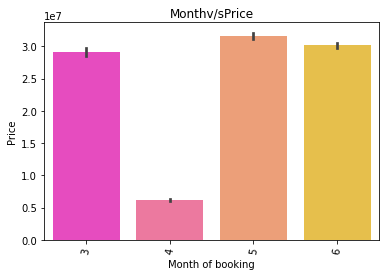

In [82]:
##Journey month v/s total fare
v1=sns.barplot(x='Month', y='Price', data=train,estimator=sum,palette='spring')
v1.set_title('Monthv/sPrice')
v1.set_ylabel('Price')
v1.set_xlabel('Month of booking')
v1.set_xticklabels(v1.get_xticklabels(), rotation=80)

In [83]:
#Counts of flights in these months
train['Month'].value_counts()

5    3465
6    3414
3    2724
4    1079
Name: Month, dtype: int64

In [84]:
#Analysis:We see that the total count of flight is maximum towards the month-May which can also be concluded from the above bar plot which shows that the sum of fare is maximum in May.This can be due to : Summer vacations in the month of may for schools/colleges, hence most families are also generally going for vacations around this time.The count of flights is lowest on the month of April, this can be because : Schools,colleges have their final exams around this time, offices are mostly busy in the month of April as it is the end of Quarter

<function matplotlib.pyplot.show>

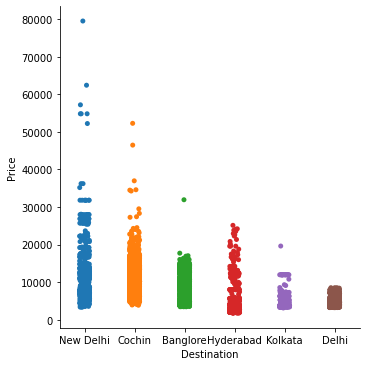

In [85]:
# Destination vs AveragePrice
sns.catplot(y='Price',x='Destination',data= train.sort_values('Price',ascending=False))
plt.show

In [86]:
#Analysis
#The airfare price range in Delhi & New Delhi is the maximum, this can be due to: Jet fuel prices in Delhi had increased in the year of 2018 by 26.4%, it is also the National Capital, political seat of power and a highly visited place for vacations(same for bangalore & cochin)
#The same reasoning can be given for higher price range in delhi as the source of the flight.


<function matplotlib.pyplot.show>

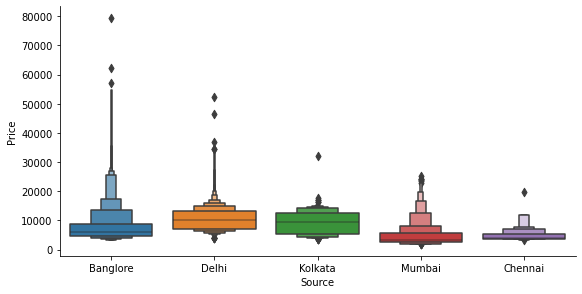

In [87]:
# Source vs AveragePrice
sns.catplot(y='Price',x='Source',data= train.sort_values('Price',ascending=False),kind="boxen",height=4, aspect=2)
plt.show

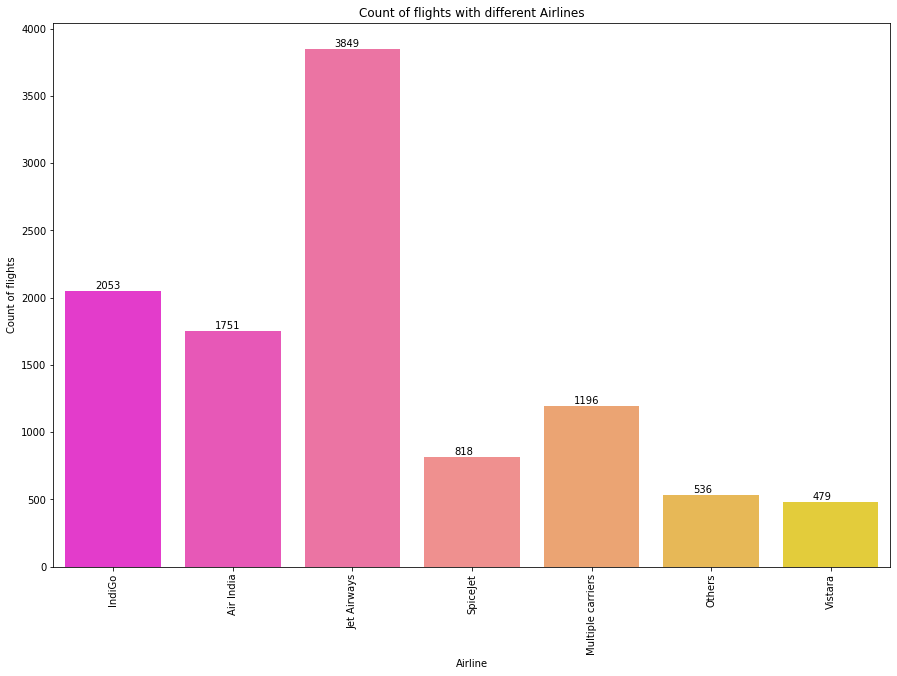

In [88]:
#Count of flights v/s Airline
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data=train,palette='spring')
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

In [89]:
#Analysis
#from the diagram below we can see that jet airways Business has the highest price apart from the first airline almost all are having similar median

<function matplotlib.pyplot.show>

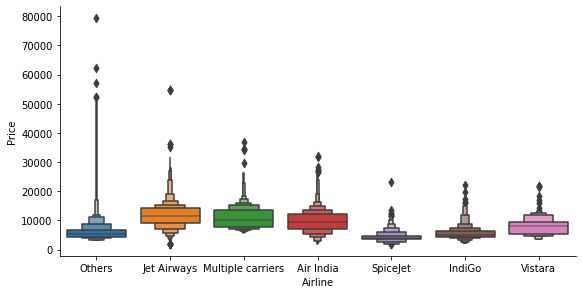

In [90]:
# Airline vs AveragePrice
sns.catplot(y='Price',x='Airline',data= train.sort_values('Price',ascending=False),kind="boxen",height=4, aspect=2)
plt.show

In [91]:
#Analysis
#Jet airways and Air India are full service airlines are and always highly priced due to various amenities they provide. Low-cost carriers like indigo and spicejet have a lower and similar fare range .

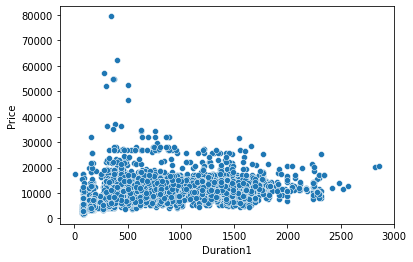

In [92]:
#Duration v/s AveragePrice
sns.scatterplot(data=train, x='Duration1', y='Price')

In [93]:
#Analysis
#We know that duration( or distance) plays a major role in affecting air ticket prices but we see no such pattern here, as there must be there are other significant factors affecting air fare like type of airline, destination of flight, date of journey of flight(higher if collides with a public holiday)

[Text(0, 0, 'Night'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening'),
 Text(0, 0, 'Afternoon')]

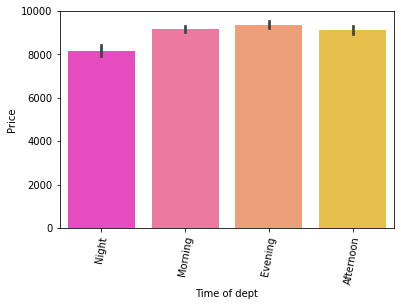

In [94]:
#Deptarure time v/s AveragePrice
v2=sns.barplot(x='Dep_Time', y='Price', data=train,palette='spring')
v2.set_ylabel('Price')
v2.set_xlabel('Time of dept')
v2.set_xticklabels(v2.get_xticklabels(), rotation=80)

In [95]:
#time of departure vs counts of flight
train['Dep_Time'].value_counts()

Morning      4331
Evening      2829
Afternoon    2017
Night        1505
Name: Dep_Time, dtype: int64

In [96]:
#Analysis:
#Early Morning flights are always cheaper and so are midnight flight prices.
#Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

[Text(0, 0, 'Night'),
 Text(0, 0, 'Afternoon'),
 Text(0, 0, 'Morning'),
 Text(0, 0, 'Evening')]

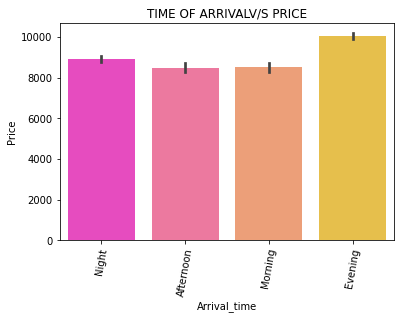

In [97]:
#TIME OF ARRIVAL V/S average price
v3=sns.barplot(x='Arrival_Time', y='Price', data=train,palette='spring')
v3.set_title('TIME OF ARRIVALV/S PRICE')
v3.set_ylabel('Price')
v3.set_xlabel('Arrival_time')
v3.set_xticklabels(v3.get_xticklabels(), rotation=80)

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4')]

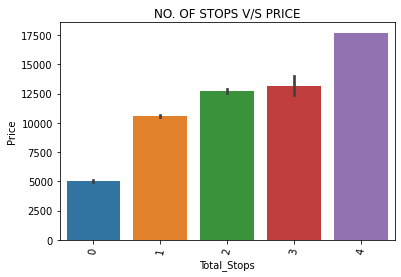

In [98]:
#total stops v/s average price
v4=sns.barplot(x='Stops', y='Price', data=train)
v4.set_title('NO. OF STOPS V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('Total_Stops')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

In [99]:
#Analysis
#As a direct/non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. As the no. of stops/layovers increase, the fare price goes up accounting for no. of flights and due to other resources being used up for the same.¶

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

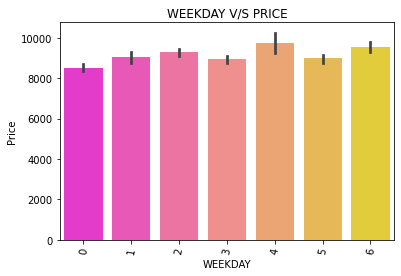

In [100]:
#WEEKDAY V/S average price
v4=sns.barplot(x='Day', y='Price', data=train,palette='spring')
v4.set_title('WEEKDAY V/S PRICE')
v4.set_ylabel('Price')
v4.set_xlabel('WEEKDAY')
v4.set_xticklabels(v4.get_xticklabels(), rotation=80)

In [101]:
#Analysis
#We see that prices are highest on a friday, that may be because this is when airlines start raising prices to make up for the lower prices before and also because weekdays are off for most people so they are mostly travelling to or travelling back.

[Text(0, 0, 'End'), Text(0, 0, 'Start'), Text(0, 0, 'Middle')]

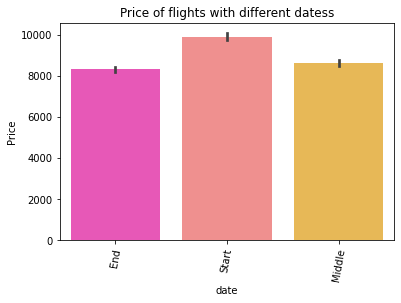

In [102]:
#Journey_Day v/s Average price 
v5=sns.barplot(x='Date', y='Price', data=big_df,palette='spring')
v5.set_title('Price of flights with different datess')
v5.set_ylabel('Price')
v5.set_xlabel('date')
v5.set_xticklabels(v5.get_xticklabels(), rotation=80)

In [103]:
#Analysis
#It looks like that there's a trend in the air fare when compared to the day of respective months, prices are higher
#in the start of month but this is not a trend if you see from the broader perspective as this might be due to various reasons
#For eg. the date of Journey is 10th March and people are booking towards 5th March or so, 
#this will lead to higher flight prices.(Prices increase as near you date of booking is to the date of journey). 

In [104]:
train.shape

(10682, 37)

Correlation tests
Pearson correlation coefficient : To check the linear association between the target variable and independent continuous variable.(this condition needs to be met)

H0: Two variables are not correlated

H1: Two variables are correlated

if p-value < 0.05, then we reject the null hypothesis and accept the H1, saying they are correlated.


AttributeError: ignored

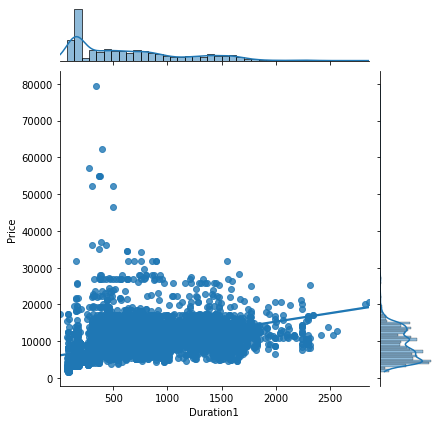

In [105]:
import scipy.stats as stats
v5 = sns.jointplot(x='Duration1',y='Price',data=train,kind = 'reg')
v5.annotate(stats.pearsonr)
plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.


In [ ]:
import scipy.stats as stats
v5 = sns.jointplot(x='Total',y='Price',data=train,kind = 'reg')
v5.annotate(stats.pearsonr)
plt.show()

We get p-value < 0.05, hence we accept H1 and say the target variable and continuous independent variable are correlated. r = 0.51 says they are moderately related.



**Feature Engineering**

In [110]:
big_df['Month'] =big_df['Month'].replace((3, 4, 5, 6),(2,1,1,1))

In [111]:
#Since the prices were relatively higher in the starting of the month so we have decided to give it a higher weight than the pther periods.
big_df['Date'] =big_df['Date'].replace(('Start','Middle','End'),(2,1,1))

In [112]:
big_df['Date'].unique()

array([1, 2])

In [113]:
air_dum = pd.get_dummies(data = big_df, columns = ['Airline','Source','Destination', 'Dep_Time', 'Additional_Info'])

In [114]:
air_dum.head(10)

,Route,Arrival_Time,Duration,Price,Date,Month,Year,Day,Stops,Hours,Minutes,Duration1,Route_1,Route_2,Route_3,Route_4,Route_5,Route_11,Route_22,Route_33,Route_44,Route_55,Route_11l,Route_22l,Route_33l,Route_44l,Route_55l,Distance1,Distance2,Distance3,Distance4,Total,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_Time_Afternoon,Dep_Time_Evening,Dep_Time_Morning,Dep_Time_Night,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
0,BLR → DEL,Night,2h 50m,3897.0,1,2,2019,6,0,2,50,170,BLR,DEL,NaN,NaN,NaN,13.198,28.567,0.000,0.000,0.0,77.706,77.103,0.000,0.000,0.0,1709.019087,8745.024719,0.000000,0.000000,10454.043807,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,CCU → IXR → BBI → BLR,Afternoon,7h 25m,7662.0,2,1,2019,2,2,7,25,445,CCU,IXR,BBI,BLR,NaN,22.655,23.314,20.244,13.198,0.0,88.447,85.322,85.818,77.706,0.0,327.968346,344.970976,1164.951588,8671.714372,10509.605282,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,DEL → LKO → BOM → COK,Night,19h,13882.0,2,1,2019,6,2,19,0,1140,DEL,LKO,BOM,COK,NaN,28.567,26.761,19.089,10.152,0.0,77.103,80.889,72.868,76.402,0.0,423.196202,1182.818371,1063.175197,8514.282404,11183.472175,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
3,CCU → NAG → BLR,Night,5h 25m,6218.0,1,1,2019,6,1,5,25,325,CCU,NAG,BLR,NaN,NaN,22.655,21.092,13.198,0.000,0.0,88.447,79.047,77.706,0.000,0.0,984.620308,888.680642,8671.714372,0.000000,10545.015322,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0
4,BLR → NAG → DEL,Night,4h 45m,13302.0,2,2,2019,4,1,4,45,285,BLR,NAG,DEL,NaN,NaN,13.198,21.092,28.567,0.000,0.0,77.706,79.047,77.103,0.000,0.0,888.680642,853.431238,8745.024719,0.000000,10487.136599,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
5,CCU → BLR,Afternoon,2h 25m,3873.0,1,1,2019,0,0,2,25,145,CCU,BLR,NaN,NaN,NaN,22.655,13.198,0.000,0.000,0.0,88.447,77.706,0.000,0.000,0.0,1545.929153,8671.714372,0.000000,0.000000,10217.643526,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
6,BLR → BOM → DEL,Morning,15h 30m,11087.0,1,2,2019,1,1,15,30,930,BLR,BOM,DEL,NaN,NaN,13.198,19.089,28.567,0.000,0.0,77.706,72.868,77.103,0.000,0.0,833.629555,1137.527550,8745.024719,0.000000,10716.181824,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
7,BLR → BOM → DEL,Morning,21h 5m,22270.0,2,2,2019,4,1,21,5,1265,BLR,BOM,DEL,NaN,NaN,13.198,19.089,28.567,0.000,0.0,77.706,72.868,77.103,0.000,0.0,833.629555,1137.527550,8745.024719,0.000000,10716.181824,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
8,BLR → BOM → DEL,Morning,25h 30m,11087.0,1,2,2019,1,1,25,30,1530,BLR,BOM,DEL,NaN,NaN,13.198,19.089,28.567,0.000,0.0,77.706,72.868,77.103,0.000,0.0,833.629555,1137.527550,8745.024719,0.000000,10716.181824,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
9,DEL → BOM → COK,Evening,7h 50m,8625.0,1,1,2019,0,1,7,50,470,DEL,BOM,COK,NaN,NaN,28.567,19.089,10.152,0.000,0.0,77.103,72.868,76.402,0.000,0.0,1137.527550,1063.175197,8514.282404,0.000000,10714.985151,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [115]:
#Standardising our numerical columns.
from sklearn.preprocessing import minmax_scale
air_dum['Duration1']=minmax_scale(air_dum['Duration1'])

In [116]:
air_dum['Total']=minmax_scale(air_dum['Total'])

In [117]:
air_dum.columns

Index(['Route', 'Arrival_Time', 'Duration', 'Price', 'Date', 'Month', 'Year',
       'Day', 'Stops', 'Hours', 'Minutes', 'Duration1', 'Route_1', 'Route_2',
       'Route_3', 'Route_4', 'Route_5', 'Route_11', 'Route_22', 'Route_33',
       'Route_44', 'Route_55', 'Route_11l', 'Route_22l', 'Route_33l',
       'Route_44l', 'Route_55l', 'Distance1', 'Distance2', 'Distance3',
       'Distance4', 'Total', 'Airline_Air India', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_Others',
       'Airline_SpiceJet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Dep_Time_Afternoon', 'Dep_Time_Evening', 'Dep_Time_Morning',
       'Dep_Time_Night', 'Additional_Info_In-flight meal not included',
       'Additional_Info_No info', 'Additional

In [118]:
#We will remove the unnecessary columns from aur air_dum data to perform regression.
air_dum.drop(columns=['Route_3', 'Route_4', 'Route_5', 'Route_11', 'Route_22', 'Route_33',
       'Route_44', 'Route_55', 'Route_11l', 'Route_22l', 'Route_33l',
       'Route_44l', 'Route_55l', 'Distance1', 'Distance2', 'Distance3',
       'Distance4','Route', 'Arrival_Time', 'Duration','Year',
      'Hours', 'Minutes','Route_1', 'Route_2'],inplace=True)

In [119]:
#Now my training data and test data will be:
training=air_dum[0:10682]
testing=air_dum[10682:]

**Feature Selection**

In [120]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [121]:
X=training.drop(['Price'],axis=1)
y=training.Price

In [122]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [123]:
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7995557434.661804, tolerance: 22714623.071221344
  positive)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [124]:
model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [125]:
selected_features=X.columns[(model.get_support())]

In [126]:
selected_features

Index(['Date', 'Month', 'Day', 'Stops', 'Duration1', 'Total',
       'Airline_Air India', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers', 'Airline_Others', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Dep_Time_Afternoon',
       'Dep_Time_Evening', 'Dep_Time_Morning', 'Dep_Time_Night',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No info', 'Additional_Info_Others'],
      dtype='object')

In [127]:
testing.head(5)

,Price,Date,Month,Day,Stops,Duration1,Total,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_Time_Afternoon,Dep_Time_Evening,Dep_Time_Morning,Dep_Time_Night,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others
0,NaN,2,1,3,1,0.227671,0.824986,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,NaN,1,1,6,1,0.082312,0.787803,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0
2,NaN,1,1,1,1,0.497373,0.824986,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,NaN,1,1,1,1,0.271454,0.824986,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
4,NaN,1,1,0,0,0.057793,0.800151,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [128]:
testing.drop(columns='Price',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [129]:
#Performing regression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #test size ka mtlb out of complete data humara 40% of data will be a test data and model will be fit upon the values of ^0% of the data

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
#MODEL EVALUATION
# print the intercept
print(lm.intercept_)

717248513997942.4


In [131]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Date,1.059085e+03
Month,1.250076e+03
Day,1.028071e+02
Stops,2.544223e+03
Duration1,-2.260290e+01
Total,5.874011e+03
Airline_Air India,-7.266601e+13
Airline_IndiGo,-7.266601e+13
Airline_Jet Airways,-7.266601e+13
Airline_Multiple carriers,-7.266601e+13


In [132]:
#MAKING THE PREDICTIONS
predictions = lm.predict(X_test)

In [133]:
print(predictions)

[12701.875  6434.375  2807.625 ...  7427.625 13041.125  7709.25 ]


In [134]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

NameError: ignored

In [135]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.6282829958779548

In [136]:
#Making the predictions on our testing data
predictions1 = lm.predict(testing)

In [137]:
testing['Predicted price']=predictions1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [138]:
testing.head(2)#airline source destination one hot mean price map skewness mean price 

,Date,Month,Day,Stops,Duration1,Total,Airline_Air India,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Others,Airline_SpiceJet,Airline_Vistara,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_Time_Afternoon,Dep_Time_Evening,Dep_Time_Morning,Dep_Time_Night,Additional_Info_In-flight meal not included,Additional_Info_No info,Additional_Info_Others,Predicted price
0,2,1,3,1,0.227671,0.824986,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,13542.875
1,1,1,6,1,0.082312,0.787803,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,6619.750


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
from sklearn import metrics
def predict(model):
    model_name = model.fit(x_train,y_train)
    print('model name {}'.format(model))
    print('\n')
    print('model score {}'.format(model_name.score(x_train, y_train)))
    predictions = model_name.predict(x_test)
    print('predictions are {}'.format(predictions))
    print('\n')
    r2_score = metrics.r2_score(y_test, predictions)
    print(r2_score)
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor())
from sklearn.model_selection import cross_val_score
score = cross_val_score(RandomForestRegressor(), X, y, cv = 10)
print(score.mean())

model name RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


model score 0.9630079697574453
predictions are [12344.17        6177.61       14888.33666667 ... 10661.66335714
 10111.2         4823.        ]


0.8776078480291432
0.8483148445881932
